# Statistical Foundations of Machine Learning: Project Classification
### Yelda Büyük || 0527366 || Master Student Computer Science || Vrije Universiteit Brussel

# Introduction
The goal of this notebook is to try to predict whether or not it will rain the next day in Brisbane (Australia) based on the observations the weather station of Sydney has recorded. This will be achieved by **classification**. We will try to classify new data by using two different machine learning algorithms, namely **K-Nearest Neighbours** and **Support Vector Machine**. We will then compare the results and the sample error produced from these algorithms. For each technique, we will be using the real-life dataset as well as a synthetically generated dataset. Finally, we will evaluatie for both type of datasets the techniques and the different accuracies for the evaluations.

# The real-life dataset

The datasets that will be used in this project are: 1) the Rain in Australia dataset and 2) a synthetic dataset which will be self-generated. This section talks about the dataset which contains observations from the weather station in Brisbane, Australia. The dataset can be found at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

As we are only interested in the observations from the weather station of Brisbane, we have already cleared the CSV file of all the other content. We have also encoded the categorial values and more information can be found in "categorical_values.csv" because some algorithms cannot handle categorical values, only numerical ones.This was the preprocessing step to clean the data.

In [1]:
import pandas as pd
data = pd.read_csv('weatherAUS.csv')
data.dropna()
data.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-07-01  Brisbane     10.3     25.2       0.0          1.4       9.5   
1  2008-07-02  Brisbane      8.1     22.9       0.0          2.0       9.8   
2  2008-07-03  Brisbane      9.7     22.4       0.0          5.8       9.4   
3  2008-07-04  Brisbane     11.8     20.0       0.8          1.8       1.1   
4  2008-07-05  Brisbane     12.3     16.7       0.0          2.0       0.3   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0           16             26          13  ...           37       1019.6   
1           15             30          15  ...           30       1018.8   
2            1             22          14  ...           52       1021.4   
3           14             24          14  ...           53       1023.5   
4           10             37          10  ...           89       1027.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1014.8         0         1     14.9     24.6          0      0.0   
1       1015.0         0         0     16.2     22.4          0      0.0   
2       1019.1         1         4     15.4     21.3          0      0.8   
3       1021.7         7         7     14.1     19.6          0      0.0   
4       1026.2         7         8     16.1     15.0          0     16.2   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             1  

[5 rows x 24 columns]

We have now replaced all NaN values with 0. This is a part of the **prepocessing** phase.
The data set contains **daily** observations from various weather stations. For this project we choose to **work with the data from the Brisbane weather station**. The goal will be to predict if there will be rain, in **Brisbane (Australia)**, the next day based on the observations.

## Visualizing the dataset
Before we start training the algorithms, we first want to enquire about some information regarding the data set. We are interested in questions such as: does pressure affect the prediction? What is the impact of the temperature? Do the clouds give us a clear view if there is a higher chance that it will rain if there are more clouds?


### Temperature
First of all, we would like to visualize some basic information from the dataset. This will give us a clear idea of the weather pattern of Brisbane. We start off by plotting the minimum and maximum temperature from 01/07/2008 to 8 years from then. 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import datetime
import matplotlib.patches as mpatches

minTemp = data['MinTemp']
maxTemp = data['MaxTemp']
x_data = data['Date']

ax_temp = plt.subplot()
ax_temp.plot(x_data, minTemp, label="Min. Temp")
ax_temp.plot(x_data, maxTemp, label="Max. Temp")
ax_temp.set_xticks([0, 362, 722, 1055, 1418, 1723, 2086, 2444, 2806])
for tick in ax_temp.get_xticklabels():
    tick.set_rotation(60)

## add legend to graph
ax_temp.legend(loc='upper right', frameon=True)

## add labels
plt.title("Temperature over a period of 8 years, Brisbane")
plt.xlabel("Date")
plt.ylabel("Temperature, C")
## show graph
plt.show()

<Figure size 640x480 with 1 Axes>

The first question that comes to mind: what can we tell from this data? We notice that the graph has a pattern. We know that the winter period in Australia starts from June 1st and runs till August 31st. We notice that the temperature drops around the winter period, which is what one would expect. The sudden drops of the temperature means that this data was not registered for that particular day.

### Pressure
More pressure means a higher chance of rain. Air rises during low pressure and rain falls during periods of high pressure. We plot this data for the period between 01/07/2008 until roughly 8 years after Visualizing this data might give us more insight.

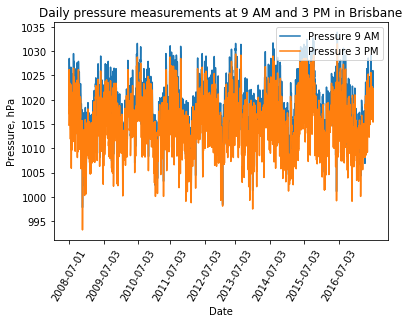

In [3]:
pressure9am = data['Pressure9am']
pressure3pm = data['Pressure3pm']

x_press = plt.subplot()
x_press.plot(x_data, pressure9am, label="Pressure 9 AM")
x_press.plot(x_data, pressure3pm, label="Pressure 3 PM")
x_press.set_xticks([0, 362, 722, 1055, 1418, 1723, 2086, 2444, 2806])

for tick in x_press.get_xticklabels():
    tick.set_rotation(60)
    
## add legend
x_press.legend(loc='upper right', frameon=True)

## add labels
plt.title("Daily pressure measurements at 9 AM and 3 PM in Brisbane")
plt.xlabel("Date")
plt.ylabel("Pressure, hPa")
plt.show()

As we take a look at the graph, we notice that during the winter periods high pressure is accumulated. During the drier seasons the pressure tends to be less. In a country with season changes this ought to be normal. Rain falls whenever the pressure is high. This means that there is a higher chance of rain falling during the winter period. The data tells us what we instinctly already know. 

### Target variable

We would also like some insight to if the dataset is balanced or not. We can do this by plotting the target variable.

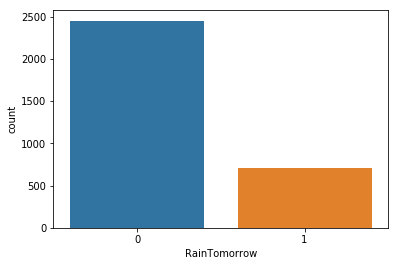

In [4]:
import seaborn as sns
sns.countplot(data['RainTomorrow'])

It looks like we have a **imbalanced** dataset. Having an imbalanced dataset means that your prediction algorithm will most likely be accurate for the bigger class, but when it has to predict an observation for the minority class, it will not be able to generate a good prediction. 

Using accuracy as performance metric will not show an accurate image of the prediction performance. We will therefore choose to change the performance metric to the use of a **confusion matrix**. Such matrix shows us more information about the correct predictions and the type of incorrect predictions.

Value 0 represents it will **not** rain tomorrow, value 1 represents that it **will** rain tomorrow in Brisbane.

# The synthetically generated dataset
The project requires us to synthetically generate a dataset. In the previous section we are working with an imbalanced real life dataset. This type of dataset could be interesting to see what effects it causes on the two classifcation techniques. However, it would also be interesting to see how accurate the techniques would be should they be executed on a perfectly balanced dataset. Hence we will be creating a synthetically perfectly balanced dataset.

In [5]:
from sklearn.datasets import make_classification
X_syn,y_syn = make_classification(n_samples=1000, n_features=21, n_informative=10,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)

We have now generated a perfectly balanced dataset of 1000 samples. We visualize this.

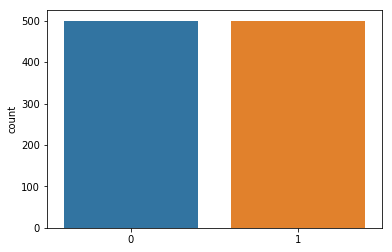

In [6]:
sns.countplot(y_syn)

# Algorithms

We are interested in predicting wether or not rain will fall the next day. We will be using two machine learning algorithms (K-Nearest Neighbours and Support Vector Machines) to **classify** new observations. Both algorithms are **supervised learning** techniques. For each algorithm we will take a look at the out-of-sample and in-sample evaluations for the real-life dataset as well as the synthetically generated dataset.

#### What is classification?
Classification, in Machine Learning is a supervised learning approach where a program learns from the input data and then uses this knowledge to try to classify new observations. Two forms exist: binary class classification or multi-class classification. Binary classfication classifies data into two results: true or false. Multi classification tries to classify new observations into one class from the multiple options (more than two). You can achieve this by combining multiple binary class classifications. 

#### What is supervised learning?
Supervised learning is the occassion where the technique makes use of input variables in order to map data to output variables. The algorithms which make use of the supervised learning technique use a training set in order to learn the mappings between input en output. 


# K-Nearest Neighbors
The first algorithm that we use is the K-Nearest Neighbors technique (also known as KNN). KNN uses data to classify new data based on similarity measures. Classification is realized by a majority vote of its closests K neighbors. For example, data point X has to be classified and K = 3. The algorithm looks at the classifcation of the 3 nearest neigbors to data point X and classifies X by holding a majority vote. 

We will generate and evaluate the accuracy for out-of-sample and in-sample sets for both datasets.

## Preprocessing the data
The first step is to preprocess the data. This will only be done for the real-life dataset as the synthetically generated one is already clean. The algorithm is not interested in the Date or Location of the observations, thus we remove them. All locations are equal to Brisbane.

In [7]:
columns = ['Date', 'Location']
data_new = data.drop(columns, axis= 1)

Next, we want to seperate the target variable (RainTomorrow) from the rest of the dataset.

In [8]:
X = data_new.loc[:, data_new.columns!='RainTomorrow']
y = data_new.iloc[:,-1] # target variable

## Out-of-sample evaluation
For each dataset we will perform an out-of-sample evaluation and an in-sample evaluation for this technique. An out-of-sample evaluation splits the data set into two **disjoint** sets: a training set and a test set. The observations within the test set cannot be members of the training set. This way we will generate predictions on **unseen** observations.

We start off by splitting the **each** dataset by making use of **cross validation**.

In [9]:
from sklearn.model_selection import train_test_split

## The real-life dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # training set is 70% of the total

## The synthetically generated dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.3)


Next up we want to initiatie the KNN model for each dataset. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def generate_knn_predictions(neighbors, x_train_value, y_train_value, X_test_value, y_test_value):
    knn = KNeighborsClassifier(n_neighbors=neighbors) 
    # fit the model
    knn.fit(x_train_value, y_train_value)
    ## accuracy score
    accuracy_test = accuracy_score(y_test_value, knn.predict(X_test_value))
    accuracy_matrix = confusion_matrix(y_test_value, knn.predict(X_test_value))
    ## print results
    print('Test_accuracy', accuracy_test)
    print('Accuracy_matrix')
    print(accuracy_matrix)

# The real-life dataset
print("Results for the real-life dataset")
generate_knn_predictions(2, X_train, y_train, X_test, y_test) #random k

# The synthetically generated dataset
print("Results for the synthetically generated dataset")
generate_knn_predictions(2, X_train_syn, y_train_syn, X_test_syn, y_test_syn) #random k

Results for the real-life dataset
Test_accuracy 0.8713080168776371
Accuracy_matrix
[[722   9]
 [113 104]]
Results for the synthetically generated dataset
Test_accuracy 0.9966666666666667
Accuracy_matrix
[[163   0]
 [  1 136]]


The results tell us that the perfectly balanced dataset returns a higher accuracy percentage. As we had seen, the real life dataset is imbalanced. It contains a lot more classes classified as 0 then there are classes classified as 1.This means that more false negatives will be generated by having an imbalanced dataset. We notice that this is true. The confusion matrix of the imbalanced dataset tells us that it has conducted a lot more false negatives than the perfectly balanced dataset.

A confusion matrix is an error matrix which visualizes the performance of an algorithm. Each row represents the instances in a predicted clas while each column represents the instances in an actual class. This means that we can interpret the numbers as follows:
* Left upper corner: the actual values and the predicted values are both classified as 1.
* Right lower corner: the actual values and the predicted values are both classified as 0.
* Left lower corner: the actual values are classified as 1, the predicted values are classified as 0 (this makes sense for the imbalanced dataset because 1 is the minority class).
* Right upper corner: the actual values are classified as 0, the predicted values are classified as 1.

The next step is to **tune** the model parameters. We are interested in finding a better K for the KNN algorithm for each dataset.

In [11]:
from sklearn.model_selection import GridSearchCV

def find_best_k(X, y):
    n_neighbors = list(range(1,30))
    hyperparameters = dict(n_neighbors=n_neighbors)
    knn_2 = KNeighborsClassifier()
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    best_model = clf.fit(X,y)
    return best_model.best_estimator_.get_params()['n_neighbors']

# The real-life dataset
print("The optimal number of neighbors for the real-life dataset is:",find_best_k(X, y))

# The synthetically generated datset
print("The optimal number of neighbors for the synthetic dataset is:",find_best_k(X_syn, y_syn))

The optimal number of neighbors for the real-life dataset is: 7
The optimal number of neighbors for the synthetic dataset is: 3


The **optimal** K for the real-life dataset is 7 and for the synthetic dataset it is 3. We will now repeat the out-of-sample prediction with K equals to its optimal value.

In [12]:
# The real-life dataset
print("Results for the real-life dataset")
generate_knn_predictions(7, X_train, y_train, X_test, y_test)

# The synthetic dataset
print("Results for the synthetic dataset")
generate_knn_predictions(3, X_train_syn, y_train_syn, X_test_syn, y_test_syn)

Results for the real-life dataset
Test_accuracy 0.8881856540084389
Accuracy_matrix
[[717  14]
 [ 92 125]]
Results for the synthetic dataset
Test_accuracy 1.0
Accuracy_matrix
[[163   0]
 [  0 137]]


The new test accuracy is higher for the real-life dataset because we fine tuned the parameter K. There is a slight increase. We notice that we have slightly less false negatives than before. The algorithm classifies actual values of 1 less as predicted values of 0 (which was the result of the issue of the class imbalance).

The balanced dataset returns a perfect accuracy for both cases. The algorithm has enough classifications in both classes to generate the best classifications for unseen data. The boundaries between the two classes is very clear in the event of a **perfectly** balanced dataset.

## In-sample evaluation

In-sample means that we use all the available data to train the model. We will then use a subset of the data as a testing subset. The observations of the testing test will already be trained and seen during the training phase. Naturally this type of evaluation will perform better than an out-of-sample evaluation.

The first step is to define the training and testing datasets for each dataset.

In [13]:
# The real-life dataset
size_data = len(X)
X_train = X[0:size_data]
y_train = y[0:size_data]
X_test = X[size_data-947:size_data] # selecting the last 30% of the dataset
y_test = y[size_data-947:size_data] 

# The synthetic dataset
size_data_syn = len(X_syn)
X_train_syn = X_syn[0:size_data_syn]
y_train_syn = y_syn[0:size_data_syn]
X_test_syn = X_syn[size_data_syn-300:size_data_syn] # selecting the last 30% of the dataset
y_test_syn = y_syn[size_data_syn-300:size_data_syn] 

The next step is intantiate the KNN model for each dataset and generate predictions/accuracy. 

In [14]:
print("Results for the real-life dataset:")
generate_knn_predictions(2, X_train, y_train, X_test, y_test)

print("Results for the synthetic dataset:")
generate_knn_predictions(2, X_train_syn, y_train_syn, X_test_syn, y_test_syn)

Results for the real-life dataset:
Test_accuracy 0.9049630411826821
Accuracy_matrix
[[741   0]
 [ 90 116]]
Results for the synthetic dataset:
Test_accuracy 0.9966666666666667
Accuracy_matrix
[[150   0]
 [  1 149]]


As our intuition had predicted it, the in-sample evaluation has a smaller error rate than the out-of-sample evaluation for the real-life dataset. The synthetic dataset stayed the same. We will use the optimal value for K and see if the accuracy improves.

In [15]:
print("Results for the real-life dataset")
generate_knn_predictions(7, X_train, y_train, X_test, y_test)

print("Results for the synthetic dataset")
generate_knn_predictions(7, X_train_syn, y_train_syn, X_test_syn, y_test_syn)

Results for the real-life dataset
Test_accuracy 0.9123548046462513
Accuracy_matrix
[[734   7]
 [ 76 130]]
Results for the synthetic dataset
Test_accuracy 1.0
Accuracy_matrix
[[150   0]
 [  0 150]]


The accuracy increased slightly for the real-life dataset. The balanced dataset stayed the same. This means that by using the optimal parameters for both evaluation types, we increase the prediction accuracy for imbalanced datasets. 

It makes sense that the in-sample evaluation has a hihger accuracy rate (and thus a smaller error rate) because it has already trained the data points that it is testing on. However, in reality this method is not very reliable and the out-of-sample evaluation/prediction is preferred.

# Support Vector Machines

Support Vector Machines is another type of a supervised machine learning model that uses classifcation algorithms for binary classifcations. The SVM model is trained upon some previously required observations and afterwards it can predict the target classes of new observations. A SVM makes use of a hyperplane (which would represent a line in two dimensions). The job of the hyperplane is to seperate the two classifications. The hyperplane is known as the **decision boundary**. On either sdie of the decision boundary a different class lives. Any new data point which falls on a side of the boundary will  be classified as the other data points of that side. Sometimes it is not possible to draw this decision boundary in 2 dimensions, thus more dimensions need to be introduced. With other words, what is the best hyperplane? 

The data has already been preprocessed to be used for the previous learning technique and thus it does not require any further cleaning.

## Out-of-sample evaluation

We start of with splitting the dataset into a training and a testing dataset for each dataset. The testing dataset cannot be part of the training dataset with an out-of-sample evaluation. 

In [16]:
# Resetting the values.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # training set is 70% of the total

# Synthetic dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.3)

A quick reminder:
* X and y represent the real life dataset.
* X_syn and y_syn represent the synthetic dataset.

The next step is to initialize the SVM for each dataset, train it, generate predictions and measure the accuracy.

In [17]:
from sklearn.svm import SVC

def generate_svm_predictions(X_train, y_train, X_test, y_test):
    svmclassifier = SVC(kernel='linear')
    svmclassifier.fit(X_train, y_train)
    y_pred = svmclassifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_matrix = confusion_matrix(y_test, y_pred)
    ## print results
    print('Test_accuracy', accuracy_test)
    print('Accuracy_matrix')
    print(accuracy_matrix)

# The real-life dataset
print("Results for the real-life dataset")
generate_svm_predictions(X_train, y_train, X_test, y_test)

# The synthetic dataset
print("Results for the synthetic dataset")
generate_svm_predictions(X_train_syn, y_train_syn, X_test_syn, y_test_syn)

Results for the real-life dataset
Test_accuracy 0.9926160337552743
Accuracy_matrix
[[737   3]
 [  4 204]]
Results for the synthetic dataset
Test_accuracy 0.9833333333333333
Accuracy_matrix
[[146   1]
 [  4 149]]


We notice that the accuracy score is pretty high. This results in an error rate for out-of-sample evaluation of ~0.06%. We do not need any further optimalization of parameters because of the high accuracy. We will now take a look at a in-sample evaluation.

## In-sample evaluation
As we had defined during the KNN algorithm, in-sample means that the observations which belong to the testing dataset also belong to the training dataset. Intuitively this means that the in-sample evaluation will even score a better accuracy for the Support Vector Machine technique. 

We start off by defining the testing and the training dataset for each dataset.

In [18]:
# The real-life dataset
size_data = len(X)
X_train = X[0:size_data]
y_train = y[0:size_data]
X_test = X[size_data-947:size_data] # selecting the last 30% of the dataset
y_test = y[size_data-947:size_data] 

# The synthetic dataset
size_data_syn = len(X_syn)
X_train_syn = X_syn[0:size_data_syn]
y_train_syn = y_syn[0:size_data_syn]
X_test_syn = X_syn[size_data_syn-300:size_data_syn] # selecting the last 30% of the dataset
y_test_syn = y_syn[size_data_syn-300:size_data_syn] 

Next, we want to initiate the model, fit it, generate predictions and measure the accuracy.

In [19]:
# The real-life dataset
print("Results for the real-life dataset")
generate_svm_predictions(X_train, y_train, X_test, y_test)

# The synthteic dataset
print("Results for the synthetic dataset")
generate_svm_predictions(X_train_syn, y_train_syn, X_test_syn, y_test_syn)

Results for the real-life dataset
Test_accuracy 0.9978880675818373
Accuracy_matrix
[[739   2]
 [  0 206]]
Results for the synthetic dataset
Test_accuracy 0.9866666666666667
Accuracy_matrix
[[150   0]
 [  4 146]]


Just as we predicted, the accuracy for an in-sample evaluation lies higher than an out-of-sample evaluation. We can see that the Support Vector Machine classifies observations much better than the K-Nearest Neighbor algorithm for the real-life dataset. However, it is slightly less accurate for the balanced dataset. Again, we have chosen to not fine tune the parameters of the SVM because of its almost-perfect accuracy.

# Evaluation

The objective of this project is to **compare** the out-of-sample and the in-sample error of two machine learning algorithms: K-Nearest Neighbors and Support Vector Machines. We made use of a real-life and a syntheticaly generated dataset to produce accuracy and sample errors. 

The real-life dataset is an imbalanced dataset. Approximately 1/4th of the classifications are classified as 1 and 3/4 as 0. This meant that the accuracy score would not be a good representation as we will have to deal with false negatives. We chose to introduce a confusion matrix to obtain more insight of the classifications.

To recap, a summary is given:
* Out-of-sample scores
    * We generated accuracy and a confusion matrix for the out-of-sample scores for both datasets. This was done for both algorithms. The KNN algorithm states that the synthetic dataset scores a much higher accuracy than the real-life dataset. This is logically correct because the synthetic dataset is balanced. It will not produce as many false negatives as the real-life dataset. After fine tuning the K parameter of KNN, the accuracy of the real-life dataset slightly increases. This means that its error rate becomes slightly smaller.
    * We repeated this proces for the Support Vector Machine for both datasets. Both datasets scored pretty high on using SVM. We decided not to optimize the parameters because of the high accuracy and the little impact it would make.
* In-sample scores
    * We repeated the above states proces for both algorithms but then by including the test data in the training phase. We notice in general that the accuracies are higher thus resulting in lower in-sample errors.
   
From these observations we can conclude that the Support Vector Machine is a better classifier when making use of this real-life dataset. The SVM performs very well due to the high dimensional space. When dealing with real-time data it is often better to use a SVM, this might be the case why it performs better than the KNN. However, KNN's are known to perform better for larger datasets, but not as well for high dimensional spaces such as the SVM.

To conclude, it is often better to use out-of-sample evalution even though the accuracy is a little bit lower in general. The reason is that it is more reliable because you are generating predictions for classifications on unseen data. It will handle tasks better for real life data. 